# Homework 3

### 1 Setting up the data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

In [3]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)
X.shape

(200000, 14)

#### 1.1

In [4]:
print('Maximum:', np.max(X, axis=0))
print('Minimum:', np.min(X, axis=0))
print('Mean:', np.mean(X,axis=0))
print('Var: ', np.var(X,axis=0))

Maximum: [  2.53000000e+02   2.49000000e+02   2.52500000e+02   2.52500000e+02
   3.10480000e+04   1.36300000e+04   9.23800000e+03   1.25170000e+02
   1.91670000e+01   1.32300000e+01   6.67610000e+01   7.39020000e+01
   9.75040000e+02   7.97200000e+02]
Minimum: [  1.93500000e+02   1.52500000e+02   2.14250000e+02   1.52500000e+02
   1.00000000e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.75890000e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.90490000e-01  -9.99900000e+02]
Mean: [  2.41601104e+02   2.27376571e+02   2.41554150e+02   2.32826768e+02
   3.08992337e+03   9.28259020e+02   1.38093830e+02   3.24857933e+00
   6.49865290e+00   2.09713912e+00   4.21766041e+00   2.69171845e+00
   1.02715905e+01   5.78148050e+00]
Var:  [  8.34991711e+01   9.26255931e+01   3.52863398e+01   9.76257317e+01
   1.56515138e+07   3.08176182e+06   4.43951746e+05   8.21948502e+00
   6.40504819e+00   4.36344047e+00   4.08637188e+00   2.19877847e+00
   4.04646245e+02   3.40652055e+03

#### 1.2

In [5]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y) 
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher) 
XtS, params = ml.rescale(Xt) # Normalize the features 
XvS, _ = ml.rescale(Xva, params) # Normalize the features

In [6]:
print('Rescaled Training Data:')
print('Maximum:', np.max(XtS, axis=0))
print('Minimum:', np.min(XtS, axis=0))
print('Mean:', np.mean(XtS,axis=0))
print('Var: ', np.var(XtS,axis=0))

Rescaled Training Data:
Maximum: [  1.24467764   1.81425059   1.80668179   1.95449774   7.30095389
   7.3734214   13.76719683   7.35307847   4.7265899    5.43214474
   7.41739991   6.11287977  37.41876648  12.78474766]
Minimum: [ -4.42216573  -3.8379954   -4.59918459  -2.91081643  -0.77951138
  -0.5162351   -0.20010711  -1.13819869  -2.10058928  -0.98959137
  -2.10536922  -1.94981435  -0.37599778 -16.3042146 ]
Mean: [  1.06831266e-14   8.26561042e-16  -3.05723447e-14  -1.16594401e-14
  -2.48689958e-17   2.87869728e-16  -1.27531319e-16   1.56654689e-15
  -1.87889704e-15  -2.18238483e-15   1.36182177e-15   3.20241611e-15
   1.23601129e-16   6.18449736e-17]
Var:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [7]:
print('Rescaled Validation Data:')
print('Maximum:', np.max(XvS, axis=0))
print('Minimum:', np.min(XvS, axis=0))
print('Mean:', np.mean(XvS,axis=0))
print('Var: ', np.var(XvS,axis=0))

Rescaled Validation Data:
Maximum: [  1.24467764   2.23293548   1.82684188   1.96667117   7.30095389
   7.3734214   13.76719683   8.79005323   4.63570003   5.43214474
  31.18517851  51.87577017  37.41876648  12.84638713]
Minimum: [ -5.16853047  -3.94266662  -4.47822409  -2.91081643  -0.77951138
  -0.5162351   -0.20010711  -1.13819869  -2.20331072  -0.98959137
  -2.10536922  -1.94981435  -0.37803148 -16.3042146 ]
Mean: [-0.01060523 -0.02050661 -0.00214827 -0.0196729   0.02250219  0.02193817
  0.0063063  -0.01349193  0.02002224  0.01896851  0.00145389  0.00757509
 -0.01767348  0.01011508]
Var:  [ 1.01024379  1.00357011  0.98673104  0.99491919  1.08000814  1.07093091
  1.01268889  0.9837464   0.99798803  1.01208974  1.04616652  1.17356962
  0.53850476  0.86569107]


### 2 Linear Classiﬁers 

In [16]:
learner = ml.linearC.linearClassify()
reg = np.linspace(0,8,21)
TrAuc = []
VaAuc = []
for i in reg:
    learner.train(XtS, Yt, i, initStep=0.5, stopTol=1e-6, stopIter=100)
    TrAuc.append(learner.auc(XtS, Yt)) # train AUC
    VaAuc.append(learner.auc(XvS,Yva))

C:\Users\PraJaL\Documents\Python Scripts\mltools\linearC.py:122: RuntimeWarning: overflow encountered in exp
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
C:\Users\PraJaL\Documents\Python Scripts\mltools\linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
C:\Users\PraJaL\Documents\Python Scripts\mltools\linearC.py:121: RuntimeWarning: invalid value encountered in greater
  yhati = 1.0 if respi > 0 else 0.0   # convert to 0/1 prediction


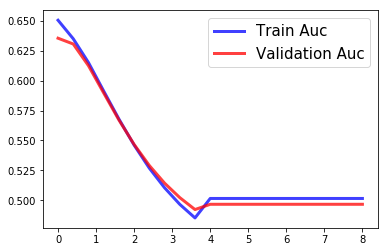

In [17]:
plt.plot(reg, TrAuc, lw=3, color='blue', alpha=0.75, label='Train Auc')
plt.plot(reg, VaAuc, lw=3, color='red', alpha=0.75, label='Validation Auc')
plt.legend(fontsize=15, loc=0)
plt.show()

#### As we can see, for legularization, as we increase the term, the train as well as validation AUC drops drastically then becomes constant. This is because increasing leg term would more likely underfit the data (model becomes smooth) till it is just random ( auc=0.5)

#### 2.2

In [4]:
XtP = ml.transforms.fpoly(Xt,2, bias=False)
XtPoly,params = ml.rescale(XtP)

XvP = ml.transforms.fpoly(Xva,2, bias=False)
XvPoly, _ = ml.rescale(XvP, params)

In [19]:
print('Features:', XtPoly.shape[1])
print('Features:', XvPoly.shape[1])

Features: 119
Features: 119


#### As we can see, our features increased from 14 to 119. This happened because fpoly adds all cross product features as well. So apart from sqaures i.e - x1^2, x2^2 ...and so on, it also adds x1*x2, x1*x3, x2*x3 ....and so on. Hence 14 orignal + 14 sqaures + 14c2 (91) = 119 features
#### 2.3

In [56]:
reg = np.linspace(0,8,21)
TrAucP = []
VaAucP = []
learner1 = ml.linearC.linearClassify()
for i in reg:
    learner1.train(XtPoly, Yt, i, initStep=1e-3, stopTol=1e-8, stopIter=100)
    TrAucP.append(learner1.auc(XtPoly, Yt)) # train AUC
    VaAucP.append(learner1.auc(XvPoly,Yva))

C:\Users\PraJaL\Documents\Python Scripts\mltools\base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
C:\Users\PraJaL\Documents\Python Scripts\mltools\linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


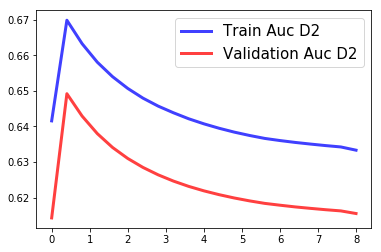

In [57]:
plt.plot(reg, TrAucP, lw=3, color='blue', alpha=0.75, label='Train Auc D2')
plt.plot(reg, VaAucP, lw=3, color='red', alpha=0.75, label='Validation Auc D2')
plt.legend(fontsize=15, loc=0)
plt.show()

### 3 Nearest Neighbors

In [29]:
knnlearner = ml.knn.knnClassify()
K = np.arange(1,51,6)
print(K)
knnTAuc = []
knnVAuc = []
for i in K:
    knnlearner.train(XtS, Yt, i, alpha=0.0)
    knnTAuc.append(knnlearner.auc(XtS, Yt)) # train AUC
    knnVAuc.append(knnlearner.auc(XvS,Yva))

[ 1  7 13 19 25 31 37 43 49]


#### 3.1

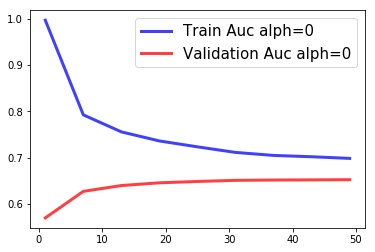

In [30]:
plt.plot(K, knnTAuc, lw=3, color='blue', alpha=0.75, label='Train Auc alph=0')
plt.plot(K, knnVAuc, lw=3, color='red', alpha=0.75, label='Validation Auc alph=0')
plt.legend(fontsize=15, loc=0)
plt.show()

#### 3.2

In [5]:
K2 = [1, 7, 15, 25]
knnlearner2 = ml.knn.knnClassify()
knnTAucOri = []
knnVAucOri = []
for i in K2:
    knnlearner2.train(Xt, Yt, i, alpha=0.0)
    knnTAucOri.append(knnlearner2.auc(Xt, Yt)) # train AUC
    knnVAucOri.append(knnlearner2.auc(Xva,Yva))

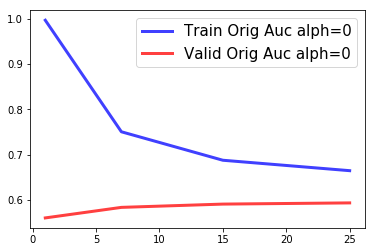

In [6]:
plt.plot(K2, knnTAucOri, lw=3, color='blue', alpha=0.75, label='Train Orig Auc alph=0')
plt.plot(K2, knnVAucOri, lw=3, color='red', alpha=0.75, label='Valid Orig Auc alph=0')
plt.legend(fontsize=15, loc=0)
plt.show()

#### Looking at both the graphs, I believe Scaled data would be a better choice
#### 3.3

In [23]:
K = [1, 10, 25]
A = range(1,4,1)
knnlearner3 = ml.knn.knnClassify()
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K): 
    for j,a in enumerate(A):
        knnlearner3.train(XtS, Yt, k, a)
        tr_auc[i][j] = knnlearner3.auc(XtS, Yt)
        va_auc[i][j] = knnlearner3.auc(XvS,Yva)

C:\Users\PraJaL\Documents\Python Scripts\mltools\knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


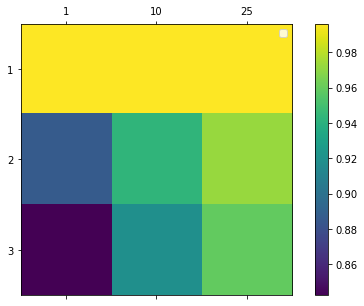

In [27]:
f, ax = plt.subplots(1, 1, figsize=(8, 5)) 
cax = ax.matshow(tr_auc, interpolation='nearest') 
f.colorbar(cax) 
ax.set_xticklabels(['tr']+[k for k in K]) 
ax.set_yticklabels(['tr']+[a for a in A])
ax.legend("Tr_Auc")
plt.show()

#### x-aixs: k, y-axis: a -> Tr_Auc 

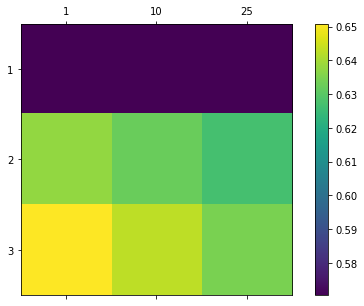

In [28]:
f, ax = plt.subplots(1, 1, figsize=(8, 5)) 
cax = ax.matshow(va_auc, interpolation='nearest') 
f.colorbar(cax) 
ax.set_xticklabels(['tr']+[k for k in K]) 
ax.set_yticklabels(['tr']+[a for a in A]) 
plt.show()

#### x-aixs: k, y-axis: a -> Va_Auc 

### 4 Decision Trees
#### 4.1

In [29]:
maxDepth_range= [10, 25, 30]
dTree_tr_auc = []
dTree_va_auc = []
for i in maxDepth_range:
    dtreelearner = ml.dtree.treeClassify(Xt, Yt, maxDepth=i, minParent=2, minLeaf=1)
    dTree_tr_auc.append(dtreelearner.auc(Xt, Yt))
    dTree_va_auc.append(dtreelearner.auc(Xva, Yva))

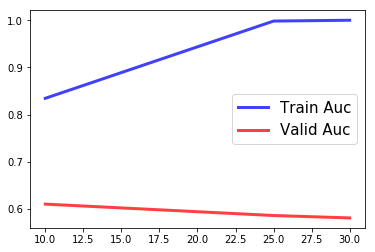

In [30]:
plt.plot(maxDepth_range, dTree_tr_auc, lw=3, color='blue', alpha=0.75, label='Train Auc')
plt.plot(maxDepth_range, dTree_va_auc, lw=3, color='red', alpha=0.75, label='Valid Auc')
plt.legend(fontsize=15, loc=0)
plt.show()

#### 4.2

In [31]:
no_of_nodes = []
no_of_nodes2 = []
for i in maxDepth_range:
    dtreelearner2 = ml.dtree.treeClassify(Xt, Yt, maxDepth=i, minParent=2, minLeaf=1)
    no_of_nodes.append(dtreelearner2.sz)
    
for i in maxDepth_range:
    dtreelearner2 = ml.dtree.treeClassify(Xt, Yt, maxDepth=i, minParent=2, minLeaf=3)
    no_of_nodes2.append(dtreelearner2.sz)

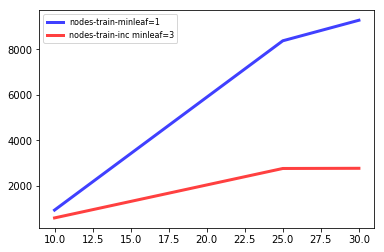

In [37]:
plt.plot(maxDepth_range, no_of_nodes, lw=3, color='blue', alpha=0.75, label='nodes-train-minleaf=1')
plt.plot(maxDepth_range, no_of_nodes2, lw=3, color='red', alpha=0.75, label='nodes-train-inc minleaf=3')
plt.legend(fontsize=8, loc=2)
plt.show()

#### 4.3

In [39]:
maxDepth_value = 25
minLeaf = [1, 10, 25]
minParent = [5, 25, 35]
dtree_tr_auc = np.zeros((len(minLeaf),len(minParent)))
dtree_va_auc = np.zeros((len(minLeaf),len(minParent)))
for i,k in enumerate(minLeaf): 
    for j,a in enumerate(minParent):
        dtreelearner3 = ml.dtree.treeClassify(Xt, Yt, maxDepth=maxDepth_value, minParent=a, minLeaf=k)
        dtree_tr_auc[i][j] = dtreelearner3.auc(Xt, Yt)
        dtree_va_auc[i][j] = dtreelearner3.auc(Xva,Yva)

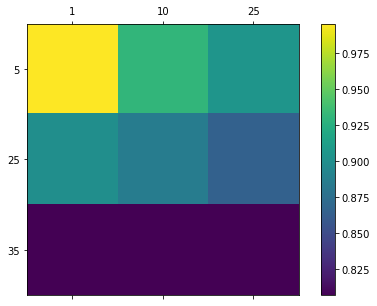

In [40]:
f, ax = plt.subplots(1, 1, figsize=(8, 5)) 
cax = ax.matshow(dtree_tr_auc, interpolation='nearest') 
f.colorbar(cax) 
ax.set_xticklabels(['tr']+[k for k in minLeaf]) 
ax.set_yticklabels(['tr']+[a for a in minParent]) 
plt.show()

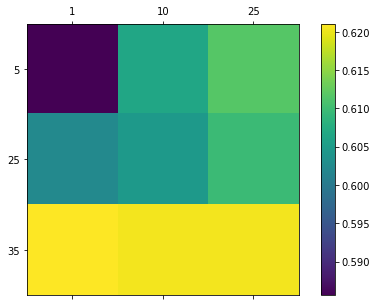

In [41]:
f, ax = plt.subplots(1, 1, figsize=(8, 5)) 
cax = ax.matshow(dtree_va_auc, interpolation='nearest') 
f.colorbar(cax) 
ax.set_xticklabels(['tr']+[k for k in minLeaf]) 
ax.set_yticklabels(['tr']+[a for a in minParent]) 
plt.show()

In [42]:
dtree_va_auc

array([[ 0.58561029,  0.60664845,  0.6117356 ],
       [ 0.60230483,  0.60467635,  0.60974723],
       [ 0.62108972,  0.62048841,  0.62046273]])

#### Based on validation Auc, I'd select minLeaf = 25 and minParent = 35
### 5 Neural Networks 

In [46]:
nn = ml.nnet.nnetClassify()

no_layers = [1, 3, 7, 10]
no_nodes = [2, 4, 7]
LayersList = [XtS.shape[1], len(np.unique(Yt))]
nn_tr_auc = np.zeros((len(no_layers),len(no_nodes)))
nn_va_auc = np.zeros((len(no_layers),len(no_nodes)))
for i, n in enumerate(no_layers):
    print("Layer:", n)
    for j, m in enumerate(no_nodes):
        for l in range(n):
            LayersList.insert(1,m)
        print("Node:", m)
        nn.init_weights(LayersList, 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=50)
        nn_tr_auc[i][j] = nn.auc(XtS,Yt)
        nn_va_auc[i][j] = nn.auc(XvS,Yva)
        print("Tr_auc:", nn_tr_auc)
        print("Va_auc:", nn_va_auc)

Layer: 1
Node: 2
it 1 : Jsur = 0.42598737138933374, J01 = 0.334
it 2 : Jsur = 0.4188628717436905, J01 = 0.3238
it 4 : Jsur = 0.4148073187216096, J01 = 0.3176
it 8 : Jsur = 0.4132538334759841, J01 = 0.316
it 16 : Jsur = 0.4129110333281823, J01 = 0.316
it 32 : Jsur = 0.41262504574402203, J01 = 0.316
Tr_auc: [[ 0.66836924  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
Va_auc: [[ 0.6484303  0.         0.       ]
 [ 0.         0.         0.       ]
 [ 0.         0.         0.       ]
 [ 0.         0.         0.       ]]
Node: 4
it 1 : Jsur = 0.45837704836051163, J01 = 0.3358
it 2 : Jsur = 0.4519948676889975, J01 = 0.3358
it 4 : Jsur = 0.44818734162764196, J01 = 0.3358
it 8 : Jsur = 0.4467273732709204, J01 = 0.3358
it 16 : Jsur = 0.4462173431178055, J01 = 0.3358
it 32 : Jsur = 0.44609826752245424, J01 = 0.3358
Tr_auc: [[ 0.66836924  0.62549447  0.        ]
 [ 0.          0.          0.        ]
 [

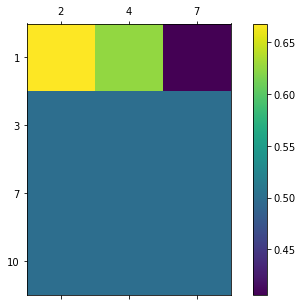

In [49]:
f, ax = plt.subplots(1, 1, figsize=(8, 5)) 
cax = ax.matshow(nn_tr_auc, interpolation='nearest') 
f.colorbar(cax) 
ax.set_xticklabels(['tr']+[k for k in no_nodes]) 
ax.set_yticklabels(['tr']+[a for a in no_layers]) 
plt.show()

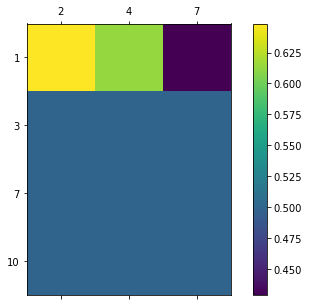

In [50]:
f, ax = plt.subplots(1, 1, figsize=(8, 5)) 
cax = ax.matshow(nn_va_auc, interpolation='nearest') 
f.colorbar(cax) 
ax.set_xticklabels(['tr']+[k for k in no_nodes]) 
ax.set_yticklabels(['tr']+[a for a in no_layers]) 
plt.show()

#### Based on these plots, I'd select No of hidden layers = 1 and no of nodes in each layer = 2
#### 5.2

In [58]:
# Custom activation function
nn1 = ml.nnet.nnetClassify()
sig = lambda z: np.atleast_2d(z) 
dsig = lambda z: np.atleast_2d(1) 
nn1.setActivation('custom', sig, dsig)
nn1.init_weights([XtS.shape[1], 5, len(np.unique(Yt))], 'random', XtS, Yt)
nn1.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=50)
tr_nn1_auc = nn1.auc(XtS, Yt)
va_nn1_auc = nn1.auc(XvS, Yva)

it 1 : Jsur = 0.42820650843217817, J01 = 0.3158
it 2 : Jsur = 0.4209332578202606, J01 = 0.3118
it 4 : Jsur = 0.41443087780875093, J01 = 0.3082
it 8 : Jsur = 0.41066610557982514, J01 = 0.3038
it 16 : Jsur = 0.4085798529965166, J01 = 0.3026
it 32 : Jsur = 0.40785152084583803, J01 = 0.3028


In [59]:
print(tr_nn1_auc, va_nn1_auc)

0.668600594086 0.649499901528


In [61]:
# hTangent activation function
sig = lambda z: np.atleast_2d(z) 
dsig = lambda z: np.atleast_2d(1) 
nn1.setActivation('htangent', sig, dsig)
nn1.init_weights([XtS.shape[1], 5, len(np.unique(Yt))], 'random', XtS, Yt)
nn1.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=50)
tr_nn1_auc = nn1.auc(XtS, Yt)
va_nn1_auc = nn1.auc(XvS, Yva)
print(tr_nn1_auc, va_nn1_auc)

it 1 : Jsur = 0.4269583749980547, J01 = 0.333
it 2 : Jsur = 0.4177806169830572, J01 = 0.3198
it 4 : Jsur = 0.41289022666095987, J01 = 0.3128
it 8 : Jsur = 0.4083972931671524, J01 = 0.309
it 16 : Jsur = 0.4054358739745418, J01 = 0.3056
it 32 : Jsur = 0.403250754619125, J01 = 0.3014
0.680221913396 0.651877252081


In [62]:
# logistic activation function
sig = lambda z: np.atleast_2d(z) 
dsig = lambda z: np.atleast_2d(1) 
nn1.setActivation('logistic', sig, dsig)
nn1.init_weights([XtS.shape[1], 5, len(np.unique(Yt))], 'random', XtS, Yt)
nn1.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=50)
tr_nn1_auc = nn1.auc(XtS, Yt)
va_nn1_auc = nn1.auc(XvS, Yva)
print(tr_nn1_auc, va_nn1_auc)

it 1 : Jsur = 0.4276638892755027, J01 = 0.3334
it 2 : Jsur = 0.41904822696515237, J01 = 0.3184
it 4 : Jsur = 0.4160733114715862, J01 = 0.3114
it 8 : Jsur = 0.4157571189168493, J01 = 0.3114
it 16 : Jsur = 0.41634709745374093, J01 = 0.3104
it 32 : Jsur = 0.41713924324534785, J01 = 0.3358
0.662521550105 0.646965660369


#### Custom activation function: Train auc = 0.6686  Valid auc = 0.6495
#### hTangent activation function: Train auc = 0.6802  Valid auc = 0.6518
#### Logistic activation function: Train auc = 0.6625  Valid auc = 0.6469

### 6 Conclusions 
#### I'm using Decision Tree in Kaggle submission with minLeaf = 25, maxDepth = 25  and minParent =35  because it gives a decent auc both on training and validation data. 
#### Kaggle uname = Prajal Trivedi
#### Kaggle Public Leaderboard AUC = 0.72552

In [65]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None) 
kg_learner = ml.dtree.treeClassify(X, Y, minLeaf = 25, maxDepth = 25, minParent = 35)
Yte = np.vstack((np.arange(Xte.shape[0]), kg_learner.predictSoft(Xte)[:,1])).T 
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

#### Ensemble of Decision Tree and NN

In [8]:
predictions_dt = []
predictions_nn = []
Xte = np.genfromtxt('data/X_test.txt', delimiter=None) 
kg_learner = ml.dtree.treeClassify(X, Y, minLeaf = 25, maxDepth = 25, minParent = 35)
predictions_dt = kg_learner.predictSoft(Xte)[:,1]
print(predictions_dt)

#Yte = np.vstack((np.arange(Xte.shape[0]), kg_learner.predictSoft(Xte)[:,1])).T 
#np.savetxt('Y_submit_ensemble.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

KeyboardInterrupt: 

In [ ]:
nn = ml.nnet.nnetClassify()
LayersList = [X.shape[1], len(np.unique(Y))]
no_layers = 1
no_nodes = 2
nn_tr_auc = []

for l in range(no_layers):
    LayersList.insert(1,no_nodes)
        
nn.init_weights(LayersList, 'random', X, Y) 
nn.train(X, Y, stopTol=1e-8, stepsize=.25, stopIter=50)
nn_tr_auc = nn.auc(X,Y)
print("Tr_auc:", nn_tr_auc)

it 1 : Jsur = 0.4465856268551801, J01 = 0.388245
it 2 : Jsur = 0.44476650290347475, J01 = 0.391115
it 4 : Jsur = 0.44399813040295616, J01 = 0.342895
it 8 : Jsur = 0.4424215700071739, J01 = 0.342895
it 16 : Jsur = 0.4413045028322976, J01 = 0.342895
it 32 : Jsur = 0.45144758576913235, J01 = 0.342895


In [25]:
predictions_nn = nn.predictSoft(Xte)[:,1]
print(predictions_nn)

[ 0.34800228  0.34800228  0.34800228 ...,  0.34800228  0.34800228
  0.34800228]


### Statement of Collaboration
1) I referred to Piazza discussions for help and also contributed answers in few threads. 
2) Referred discussion notebooks which helped me solve my doubts in Python code and guided me
3) I put up a question on Piaza which helped me get answers from other students.